# OpenCV's basic image processing tools 

OpenCV (Open Source Computer Vision Library) is a powerful Python module widely used for computer vision and image processing tasks. It provides a vast array of tools for **real-time image manipulation**, **video analysis**, and **machine learning (ML)**, enabling developers to **detect and track objects**, **recognize patterns**, and perform tasks like **face detection** or **edge detection**. OpenCV supports multiple programming languages, including __Python__, C++, and Java, and works efficiently across platforms. With extensive support for hardware acceleration and integration with libraries like __NumPy__, OpenCV is ideal for applications requiring high-speed image and video processing. Its open-source nature and active community make it a popular choice in research, development, and production environments.

__Aim:__
- start with the basic concepts of image processing/modification
- learning simple openCV modules, getting used to function names, and the parameters that can have effect on the output
- to prepare for more advanced and complex functions of the OpenCV (see openCV_imageproc_02.ipynb in the same folder)

__Steps/Methods/functions involved:__
- first of all installing the module,
- creating a full black image that will be used for modifications (drawing),
- discovering image properties,
- drawing shapes on an image (full black or else, not important!),
- understanding 3 layered image array stack nature
- understanding pixel values (channel/color intensities)
- creating simple color intensity histograms (for each/all color channels).

__Config&environment:__
Suggested (tested) for
- OpenCV-Python Version 4.10.0, or above (Jan 2025).
- Numpy 1.26.4 or above,
- requires scikit image (for image loads from the internet)
Check whether opencv is already installed. If not, the code in the next cell will fail (ModuleNotFound).

In [6]:
import cv2

If required, install the OpenCV python module either by installing from the source, or via pip (package manager), or install via apt.

Use cell magic '%%sh' and python command in new line or '!' at the beginning of the python command to run shell commands

In [30]:
!pip install opencv-python  

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [46]:
import numpy as np #for basic mathematical processing of arrays (becasue images are 2D or stacks of 2D arrays)

In [48]:
print("OpenCV-Python Version {}".format(cv2.__version__))
print("Numpy Python Version {}".format(np.__version__))

OpenCV-Python Version 4.10.0
Numpy Python Version 1.26.4


## Creating a full black image

Let's create a 512*512 pixel sized completely black and a completely white image. Then investigate the properties of the image.

Note that here numpy (renamed as np) module is used as images are basically stacks of 2D arrays. Explained more in __SciKitimage/00_images_are_arrays.ipynb__ notebook of this Git folder.

In [33]:
# Create a black image
import numpy as np
img_black = np.zeros((512,512,3), np.uint8)
img_white = np.ones((512,512,3), np.uint8)*255

In [4]:
print(img_black.shape)
print(img_white.shape)

(512, 512, 3)
(512, 512, 3)


512*512 pixels in 3 layers (stacks). Why 3 layers? Learn more about Red-Green-Blue (RGB) images and layers = channels.

Not surprisingly the the pixel at position X, Y:  is black or white, all layer's pixel value is 0 or 255, respectively.
255 is the maximum value for a uint8 (8bit) image, range 0-255. 

In [24]:
img_black[261,261,:], img_white[261,261,:]

(array([0, 0, 0], dtype=uint8), array([255, 255, 255], dtype=uint8))

There are different ways to visualize the image(s). InNotebooks, the mostly used module is __Matplotlib__. OpenCV is also an option, but for simple image load and presentation it is too sophisticated (and large in size). 

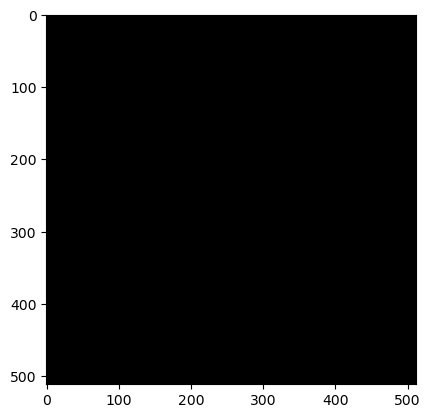

In [34]:
from matplotlib import pyplot as plt
plt.imshow(img_black)

Let's try cv2 image visualizer tool, but be careful, this pops-up a separate GUI (window) and may behave faulty. Close the window when you are done and if you experience errors, restart the kernel (and skip this step for the next time).

In [ ]:
cv2.imshow('Grayscale', img_black)

There are plenty of things to discuss about color representation (mapping), (re)sizing of the images and their visualized (figure/frame) size but see the __SciKitimage/00_images_are_arrays.ipynb notebook__ for such details.

# Drawing Functions
Using the OpenCV functions below an image can be modified, independently if it is fully black or else! The most important is to know what type of (geometrical) shape or text we would like to draw and where!. Positions are given as (X,Y) coordinates, in pixel values. 
in OpenCV the method requires generally the following inputs:
cv2.[shape]([imgarrayinput], (topleftcornerX, topleftcornerY),(topleftcornerX, bottomrightcornerY),(R,G,B), linewidth (px))

Note that pixels are indexed from 0 to 511 (for this image).

Note 2: opencv uses BGR channel order (color coding), while matplotlib uses RGB colors, thus conversion = reorganized image array layers are required!

In [59]:
# Draw a diagonal blue line with thickness of 5 px
img = img_black
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

# Drawing Rectangle
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Drawing Circle
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# Drawing Ellipse
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

# Drawing Polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

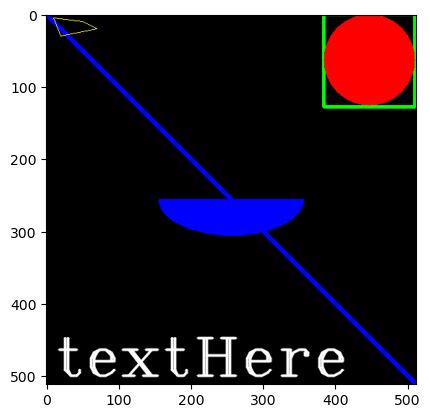

In [60]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

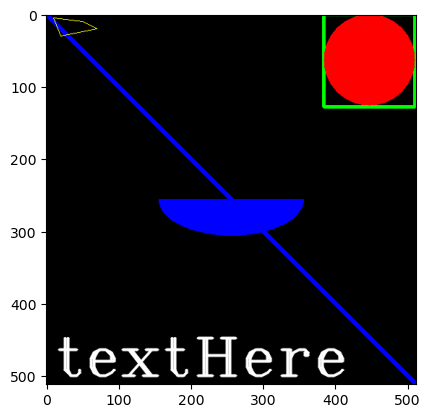

In [61]:
# Adding Text to Images
font = cv2.FONT_HERSHEY_COMPLEX_SMALL # or FONT_HERSHEY_SIMPLEX, delete font name back to the '.' then hit TAB button, wait for suggestion list 
cv2.putText(img,'textHere',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Check the color at the given pixel, now:

In [39]:
img_black[261,261,:] #around the center

array([255,   0,   0], dtype=uint8)

Let's check the image split into the 3 color layers. Understand the colors and the combined image.

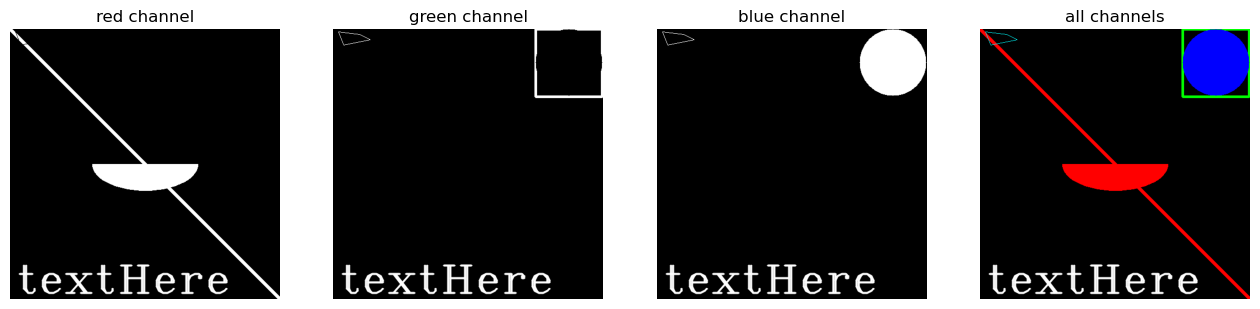

In [62]:
r = img[..., 0]
g = img[..., 1]
b = img[..., 2]

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

Check the color intensity histograms of the image: how many (y-axis) pixels do we have in one specific channel with a given intensity value (x-axis)?

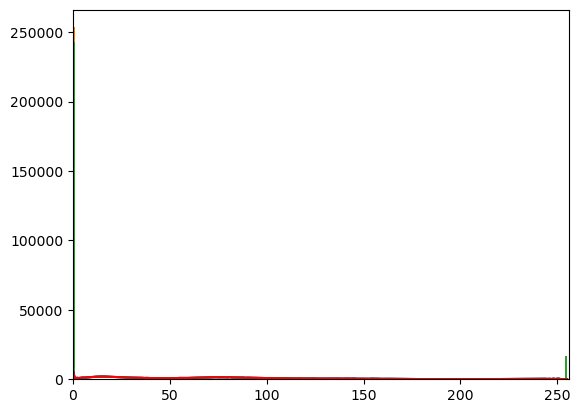

In [57]:
plt.figure()
plt.clf()
color = ('b','g','r')
for i,col in enumerate(color):
    #histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.hist(img[:,:,i].ravel(), range=[0,255], bins=256) #, bins=None, density=False, weights=None, cumulative=False)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Note that __img[:,:,i]__ splits the 3 layered image to 2D arrays for each color in the for cycle, where i gets the values 0,1,2 in the corresponding runs! 
It is barely understandable, but it is due to the fact that the majority of the pixels are black. Now, see a colorful image.

Load a more colourful and more filled (with content) image!

In [64]:
from skimage import io #using only for image load from the internet
butterfly_orig = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/butterfly.jpg?raw=true')
butterfly = butterfly_orig.copy() # safety copy

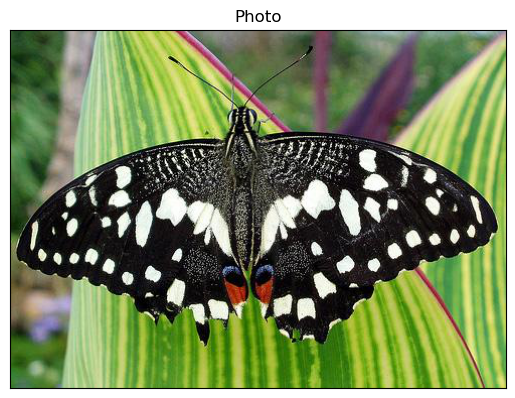

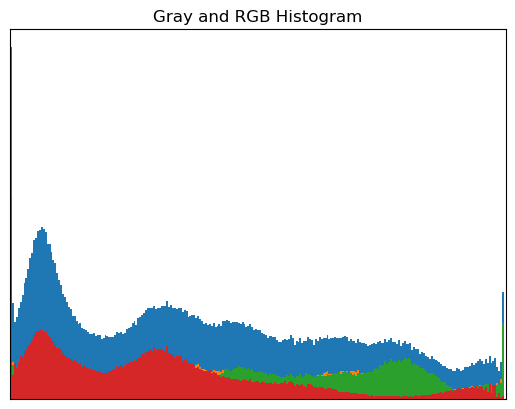

In [67]:
img = butterfly.copy()

plt.figure()
plt.imshow(img)
plt.title('Photo'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.hist(img.ravel(),range=[0,255], bins=256) #corrected for new hist() function requirements
plt.title('Gray and RGB Histogram'), plt.xticks([]), plt.yticks([])
color = ('b','g','r')
for i,col in enumerate(color):
    #histr = cv2.calcHist([img],[i],None,[256],[0,256]) #deprecated
    plt.hist(img[:,:,i].ravel(), range=[0,255], bins=256) #plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Let's see the 3 color layers separately, for this image as well.

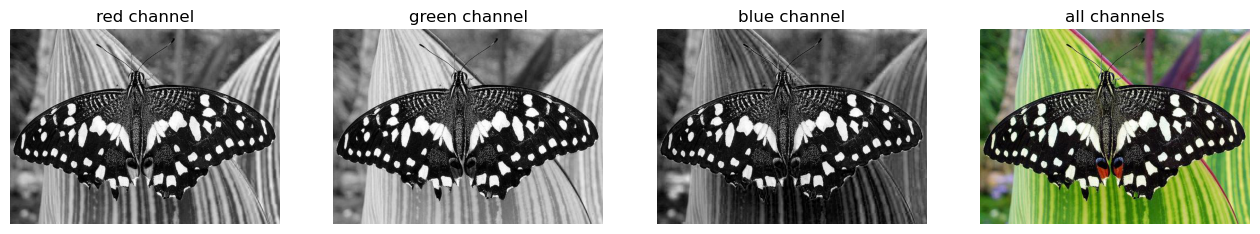

In [71]:
r = img[..., 0]
g = img[..., 1]
b = img[..., 2]
# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

Question: are the colors matching the color channel (layer) of the image? Check histogram for each layer separately!

Test what you have learned!